In [24]:
import pandas as pd
from sktime.datasets import load_gunpoint
from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score 

In [77]:
ts = pd.read_csv("ts_transformed.csv")

ts['rating_category'] = ts['rating_category'].replace('Low', 'Medium Low')

In [79]:
ts

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593844,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.713518,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.552261,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.589085,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High


# Clustering

## Distance-based Clustering

### Euclidean

In [80]:
ts_numeric = ts.drop(columns=['id', 'rating', 'genre', 'rating_category'])

train, test = train_test_split(ts_numeric, test_size = 2, random_state = 42)

In [81]:
# !pip install tslearn
# !pip install h5py
# !pip install scikit-learn-extra

In [82]:
# from sklearn_extra.cluster import KMedoids
# from tslearn.metrics import cdist_dtw

# # Calcolo matrice di distanza DTW con vincolo Sakoe-Chiba
# dists = cdist_dtw(ts_numeric, global_constraint="sakoe_chiba", sakoe_chiba_radius=4)

# # Clustering con KMedoids
# clusterer = KMedoids(n_clusters=3, metric="precomputed", random_state=0)
# clusterer.fit(dists)
# labels = clusterer.labels_

In [83]:
clusterer = TimeSeriesKMeans(n_clusters=7, metric="euclidean", random_state=42)

In [84]:
# Convertiamo il DataFrame in un array NumPy 3D con forma (n_istanze, 1, n_timepoint)
def convert_to_numpy3D(df):
    return np.expand_dims(df.values, axis=1)

# Applichiamo la conversione
ts_numeric = convert_to_numpy3D(ts_numeric)

clusterer.fit(ts_numeric)

TimeSeriesKMeans(n_clusters=7, random_state=42)

In [85]:
clusterer.labels_

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [86]:
ts_numeric = pd.DataFrame(ts_numeric.reshape(1134, 100))
ts_numeric["cluster"] = clusterer.labels_
ts_numeric.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,cluster
0,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,0.674897,...,-0.668877,-0.801254,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,0
1,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,0.073705,...,0.826150,-0.211159,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,1
2,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,0.346184,...,0.003613,-0.043587,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,1
3,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,-0.575373,...,-0.231107,-0.266140,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,1
4,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,1.226049,...,-0.648343,-0.639480,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,5


c:\Users\Lavigi\programmi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lavigi\programmi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lavigi\programmi\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lavigi\programmi\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

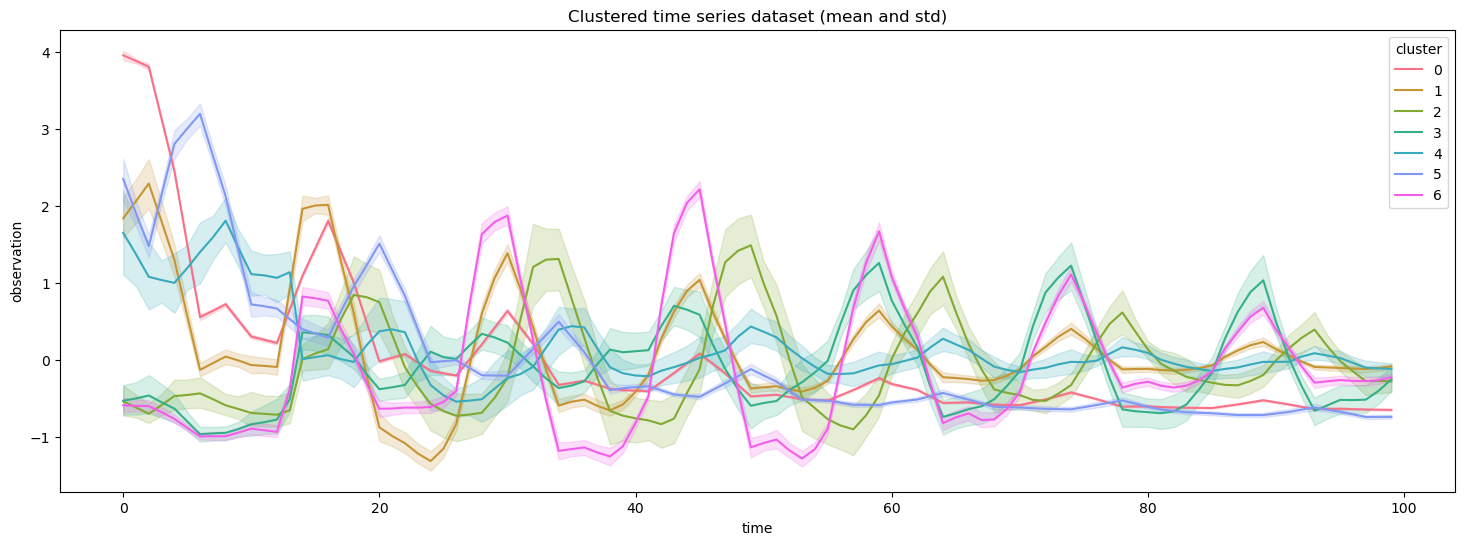

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt del DataFrame
df_melt = ts_numeric.melt(value_name="observation", var_name="time", id_vars="cluster")

# Usa una palette più colorata (es. 'husl' o 'tab10')
palette = sns.color_palette("husl", n_colors=df_melt["cluster"].nunique())

plt.figure(figsize=(18, 6))
# Line plot
sns.lineplot(data=df_melt, x="time", y="observation", hue="cluster", palette=palette)
plt.title("Clustered time series dataset (mean and std)")
plt.show()

Questo codice serve a visualizzare l'andamento delle serie temporali raggruppate per cluster, usando colori distinti per ogni cluster. È utile per analizzare visivamente come si comportano i diversi gruppi nel tempo.

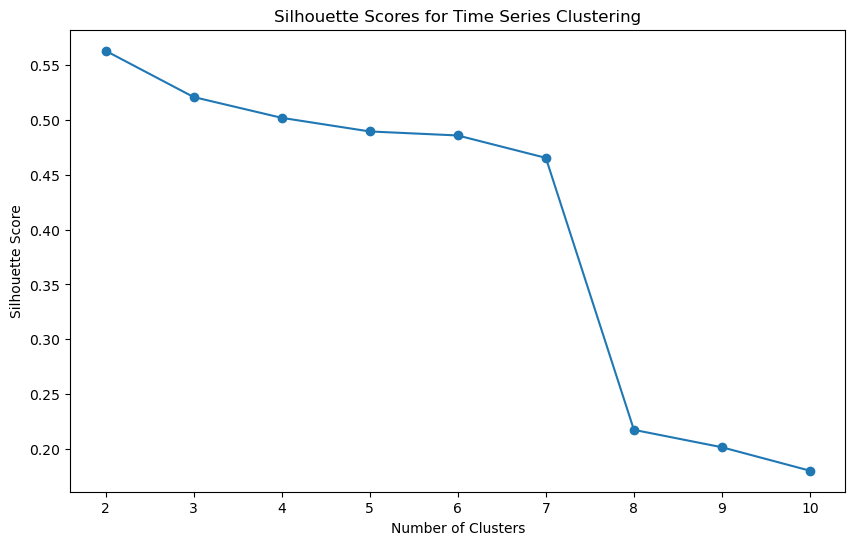

In [88]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Funzione per convertire i dati in formato 3D
def convert_to_numpy3D(data):
    return np.array(data).reshape((data.shape[0], data.shape[1], 1))

# Funzione per calcolare i silhouette score
def compute_silhouette_scores(data, min_clusters=2, max_clusters=10):
    silhouette_scores = []
    data_3d = convert_to_numpy3D(data)
    
    for k in range(min_clusters, max_clusters + 1):
        clusterer = TimeSeriesKMeans(n_clusters=k, metric="euclidean", random_state=42)
        cluster_labels = clusterer.fit_predict(data_3d)
        
        # Calcolo del silhouette score
        score = silhouette_score(data_3d.reshape(data_3d.shape[0], -1), cluster_labels, metric="euclidean")
        silhouette_scores.append(score)
    
    return silhouette_scores

# Calcolo dei silhouette score
silhouette_scores = compute_silhouette_scores(ts_numeric)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Time Series Clustering')
plt.show()

In [89]:
silhouette_scores

[0.5633725714247835,
 0.52109922339879,
 0.5021257835608709,
 0.4896764916295141,
 0.48600260158994946,
 0.4655649160893814,
 0.21725589621855326,
 0.20135115482675575,
 0.17993537623415973]

é stato provato sia dtw che euclidean, ma euclidean ha portato a cluster piu separati e definiti rispetto a dtw

### Prova distribuzioni classi

In [90]:
ts["cluster"] = clusterer.labels_
ts

,id,0,1,2,3,4,5,6,7,8,...,94,95,96,97,98,99,rating,genre,rating_category,cluster
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High,0
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High,1
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High,1
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High,1
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium,0
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium,0
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High,0
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High,0


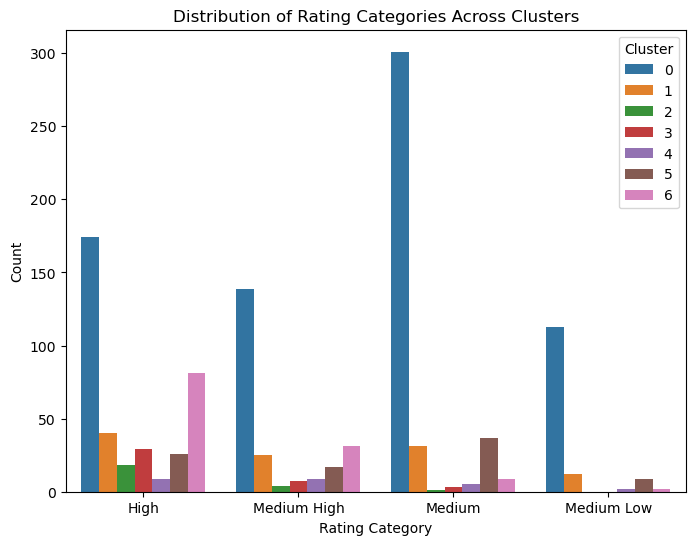

In [91]:

# Explode the 'genre' column to have one genre per row
#ts_exploded = ts.explode('rating_category')

# Plot the distribution of rating categories across clusters
plt.figure(figsize=(8, 6))
sns.countplot(data=ts, x='rating_category', hue='cluster')
plt.title('Distribution of Rating Categories Across Clusters')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


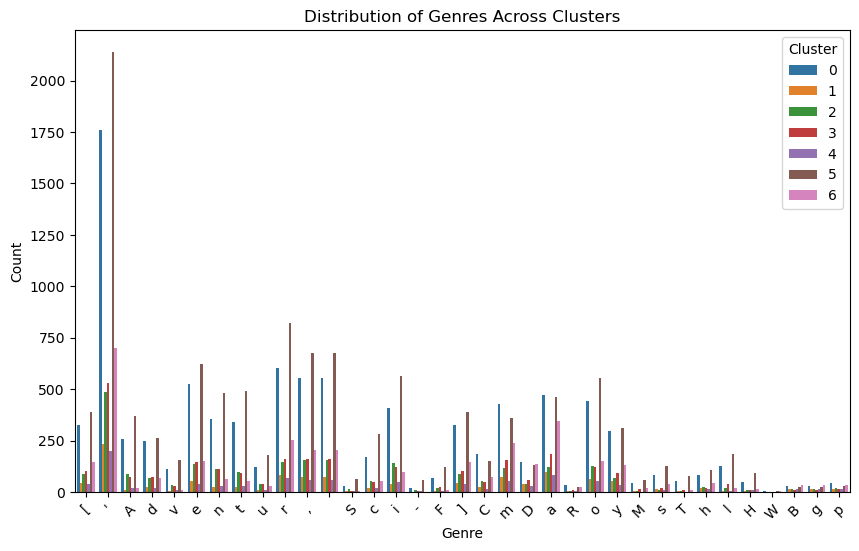

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create a list of tuples (cluster, genre)
cluster_genre_list = [(cluster, genre) for cluster, genres in zip(ts['cluster'], ts['genre']) for genre in genres]

# Count the occurrences of each (cluster, genre) pair
cluster_genre_count = Counter(cluster_genre_list)

# Convert the Counter object to a DataFrame for plotting
genre_cluster_df = pd.DataFrame(cluster_genre_count.items(), columns=['cluster_genre', 'count'])
genre_cluster_df[['cluster', 'genre']] = pd.DataFrame(genre_cluster_df['cluster_genre'].tolist(), index=genre_cluster_df.index)
genre_cluster_df = genre_cluster_df.drop(columns=['cluster_genre'])

# Plot the distribution of genres across clusters
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_cluster_df, x='genre', y='count', hue='cluster')
plt.title('Distribution of Genres Across Clusters')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()



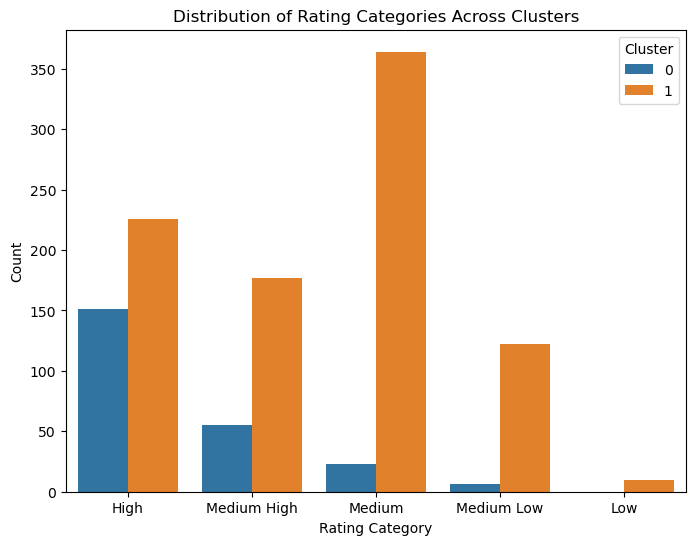

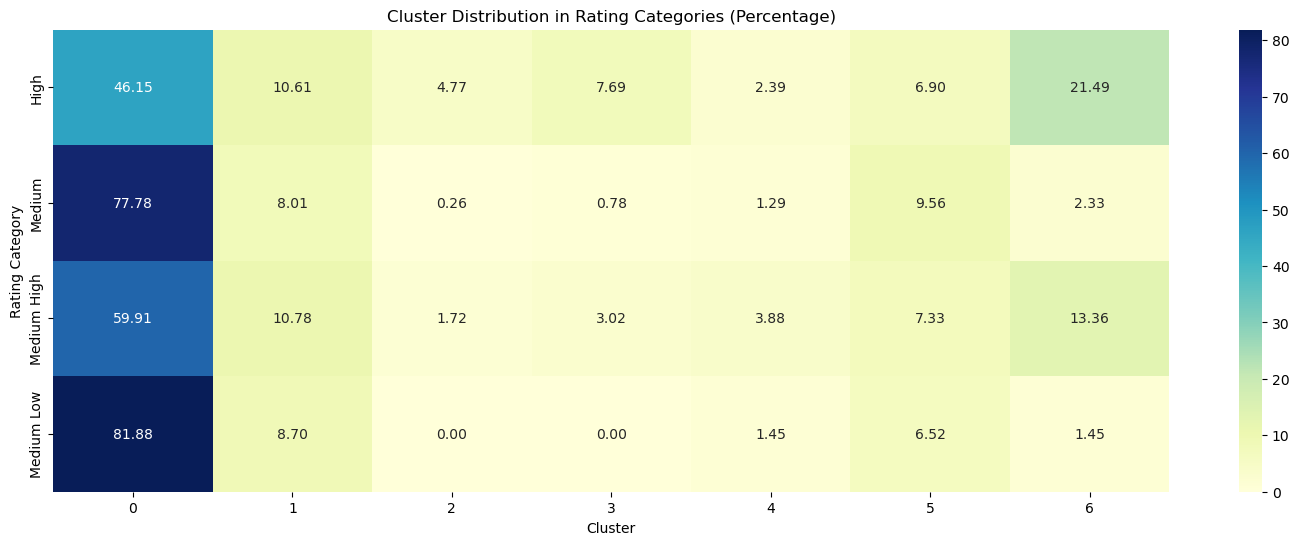


Cluster Purity by Rating Category:
cluster
0    0.308148
1    0.282891
2    0.706598
3    0.669785
4    0.430659
5    0.315467
6    0.556295
dtype: float64


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione delle categorie di rating per cluster
rating_distribution = ts.groupby(['rating_category', 'cluster']).size().unstack(fill_value=0)

# Converte i conteggi in percentuali rispetto al totale per ciascuna categoria di rating
rating_distribution_percentage = rating_distribution.div(rating_distribution.sum(axis=1), axis=0) * 100

# Crea la heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(rating_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Cluster Distribution in Rating Categories (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Rating Category')
plt.show()

# Calculate cluster purity for rating category
rating_purity = rating_distribution_percentage.max(axis=0) / rating_distribution_percentage.sum(axis=0)

print("\nCluster Purity by Rating Category:")
print(rating_purity)

In [93]:
rating_purity.mean()

0.4671204677882105

In [94]:
import pandas as pd
from ast import literal_eval

ts_gen = ts

# Convert the genre column from string representation of list to actual list
ts_gen['genre'] = ts_gen['genre'].apply(literal_eval)

# Create a new DataFrame with binary columns for each genre
genres = set(g for sublist in ts_gen['genre'] for g in sublist)
for genre in genres:
    ts_gen[genre] = ts_gen['genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original genre column
ts_gen = ts_gen.drop(columns=['genre'])

ts_gen

,id,0,1,2,3,4,5,6,7,8,...,Horror,Mystery,Musical,Sport,Animation,Family,History,Music,Short,Action
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,0,0,0,0,0,0,0,0,0,0
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,0,0,0,0,0,0,0,0,0,0
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,0,0,0,0,0,0,0,1,0,0
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,0,0,0,0,0,0,0,0,0,1
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,1,1,0,0,0,0,0,0,0,0
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,0,0,0,0,0,0,0,0,0,0
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,1,0,0,0,0,0,0,0,0,0
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,0,0,0,0,0,0,1,0,0,0


In [95]:

ts_gen.iloc[:, -22:]


,Sci-Fi,Biography,Documentary,Drama,Western,War,Adventure,Fantasy,Romance,Crime,...,Horror,Mystery,Musical,Sport,Animation,Family,History,Music,Short,Action
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1130,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1132,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
ts_gen.columns

Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       'Horror', 'Mystery', 'Musical', 'Sport', 'Animation', 'Family',
       'History', 'Music', 'Short', 'Action'],
      dtype='object', length=126)

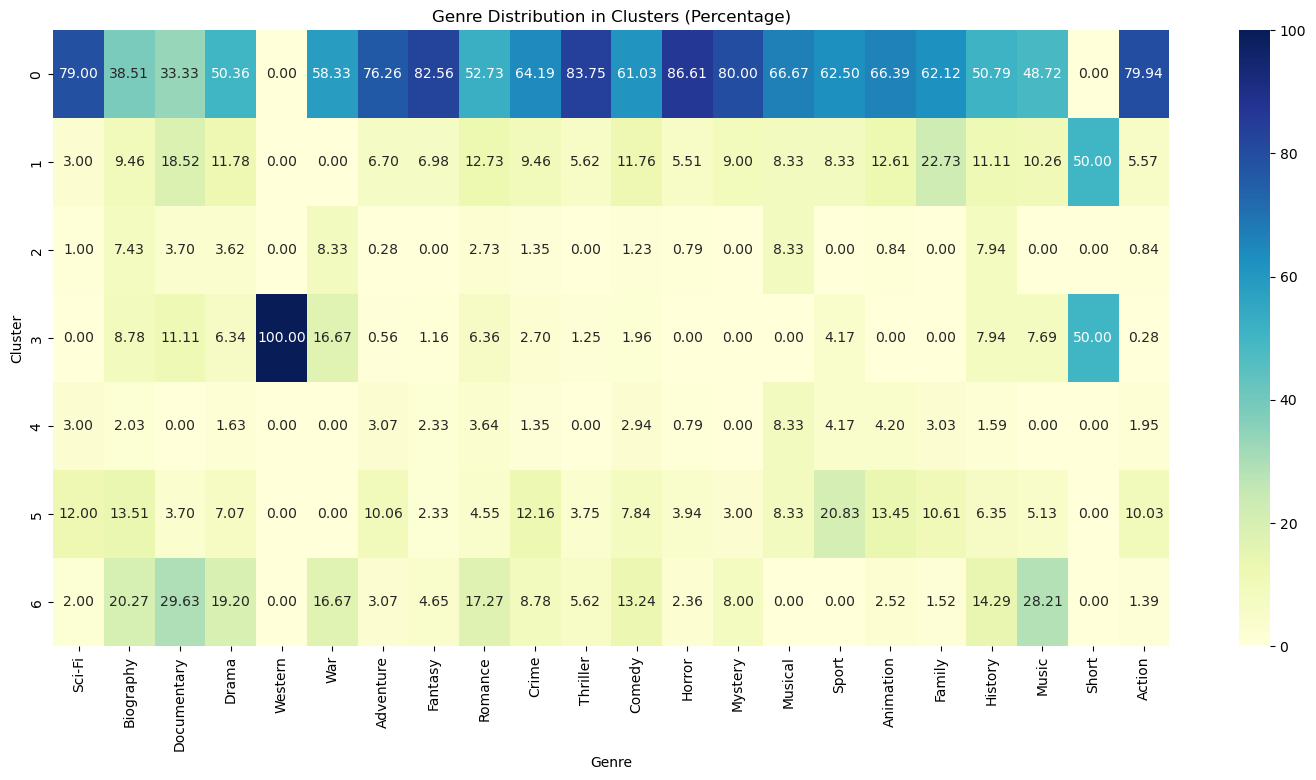

Cluster Purity by Genre:
cluster
0    0.067467
1    0.208803
2    0.172143
3    0.440578
4    0.189217
5    0.131337
6    0.149123
dtype: float64


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la distribuzione dei generi per cluster
genre_columns = ts_gen.columns[-22:]
genre_distribution = ts_gen.groupby('cluster')[genre_columns].sum()

# Converte i conteggi in percentuali rispetto al totale per ciascun genere
genre_distribution_percentage = genre_distribution.div(genre_distribution.sum(axis=0), axis=1) * 100

# Crea la heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(genre_distribution_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Genre Distribution in Clusters (Percentage)')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()

# Calcola la purity per ciascun genere
genre_purity = genre_distribution_percentage.max(axis=1) / genre_distribution_percentage.sum(axis=1)

print("Cluster Purity by Genre:")
print(genre_purity)

In [98]:
genre_purity.mean()

0.1940955392363363

## Feature Based

In [102]:
# !pip install tsfresh

   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ------- -------------------------------- 7.6/41.2 MB 39.0 MB/s eta 0:00:01
   ---------------- ----------------------- 16.5/41.2 MB 40.0 MB/s eta 0:00:01
   --------------------------- ------------ 28.3/41.2 MB 44.9 MB/s eta 0:00:01
   -------------------------------------- - 39.8/41.2 MB 47.8 MB/s eta 0:00:01
   ---------------------------------------- 41.2/41.2 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [104]:
ts_eff = TSFreshFeatureExtractor(default_fc_parameters="comprehensive", show_warnings=False, disable_progressbar=True) 

ModuleNotFoundError: TSFreshFeatureExtractor requires package 'tsfresh' to be present in the python environment, but 'tsfresh' was not found. 'tsfresh' is a dependency of TSFreshFeatureExtractor and required to construct it. To install the requirement 'tsfresh', please run: `pip install tsfresh` 

In [101]:
X_transform1 = ts_eff.fit_transform(ts_numeric)
X_transform1

NameError: name 'ts_eff' is not defined

In [ ]:
clusterer = DBSCAN(eps=0.5, min_samples=5)